In [16]:
import numpy as np
from scipy.optimize import linprog
from scipy import optimize
import cvxpy
import matplotlib.pyplot as plt

# Содержание<a name="0"></a>

1. [Вступление](#1)
2. [Метод Лагранжа](#2)
3. [Метод Лагранжа. Ограничения ─ неравенства](#3)
4. [Линейное программирование](#4)
5. [Практика. Линейное программирование](#5)
6. [Градиентный спуск](#6)
7. [Практика. Градиентный спуск](#7)
8. [Градиентный спуск с momentum](#8)
9. [Матрица Гессе](#9)
10. [Метод отжига](#10)

---

# Вступление<a name="1"></a>

> __Машинное обучение__ — это процесс, в ходе которого система сама обрабатывает большое число примеров, выявляет закономерности и использует их, чтобы спрогнозировать характеристики новых данных. А градиентный спуск является одним из способов обучения. Более подробно об алгоритмах машинного обучения пойдет речь в следующих модулях нашего курса. Сейчас мы изучаем математические принципы, лежащие в основе этой области.

__Задача оптимизации__ — найти максимум или минимум функции:

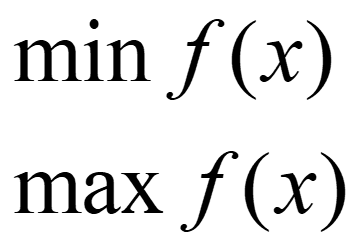

При этом функция *__f__* на вход может принимать одну переменную, вектор из нескольких переменных, или другой объект, но возвращать всегда число. Функция может быть абсолютно любой:

* элементарная функция;

* функция потерь модели предсказаний, например, количество топлива, которое потратит грузовик, если будет ехать по маршруту *__х__*, или заработная плата в зависимости от времени, потраченного на обучение.

Как правило, нужно найти значение функции и *__х__*, который приводит к __оптимальному значению__.  

Иногда накладывается какое-нибудь дополнительное условие на *__х__*.

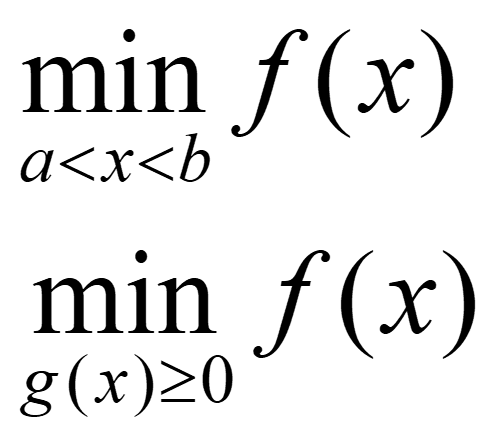

> Например, нельзя потратить на обучение отрицательное количество часов. Точно также проблематично тратить больше 22 часов в сутки. Чаще всего ограничение выражается равенством или неравенством на другую функцию от *__х__*. Например, грузовики должны проехать по всем пунктам, т.е. имеем ограничение: «Количество посещённых пунктов равно 10» или «Количество посещённых пунктов минус 10 = 0».

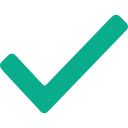

Задачу на нахождение максимума можно свести к задаче на нахождение минимума, т.к. максимум функции соответствует минимуму функции со знаком минус

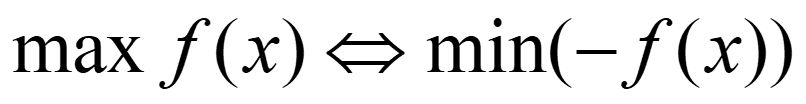

В этом модуле мы будем говорить только о **минимизации**. Формулировка достаточно общая, но за счёт такой общей постановки задачи её применение встречается во всех областях, где есть математика.

[К содержанию](#0)

---

# Метод Лагранжа<a name="2"></a>

В случае __безусловной оптимизации__ в модуле 3 мы решали задачи, приравнивая к нулю производную функции одной переменной или все частные производные в многомерном случае; далее находили экстремумы и выбирали минимум.  

Что делать, если есть __условие__? Рассмотрим __задачу оптимизации с ограничениями__.  

Для того, чтобы найти минимум функции *__f(x)__* при условии, что имеется ограничение *__φi(х) = 0__*

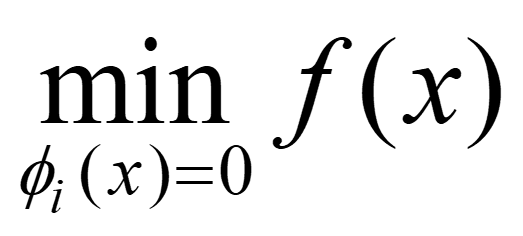

Составляется __функция Лагранжа__:

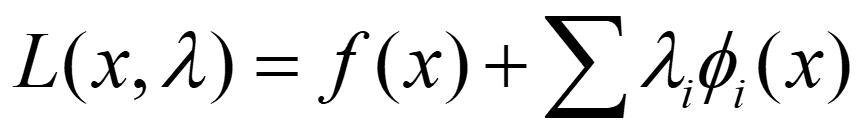

И вычисляются частные производные построенной функции Лагранжа по *__x__* и дополнительной переменной *__λ__*, далее знакомым образом находятся точки, в которых производные равны нулю, и точки экстремума. Так задача условной оптимизации сводится к задаче безусловной оптимизации. Самое сложное в оптимизации — сформулировать задачу на языке математики.

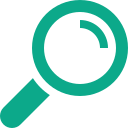

### Задача

У вас есть 20 метров забора, можно им огородить любой прямоугольник. Какую максимальную площадь можно огородить?

__Решение:__

Сформулируем задачу оптимизации. Пусть мы будем огораживать прямоугольник со сторонами x1 и x2. Тогда нам нужно максимизировать площадь при периметре равном 20 м

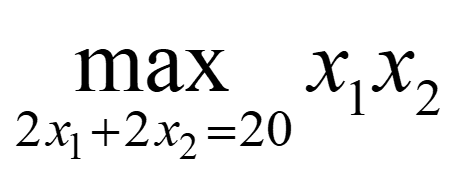

Теперь сведём задачу к минимизации и переформулируем ограничение к виду *__φ(х) = 0__*:

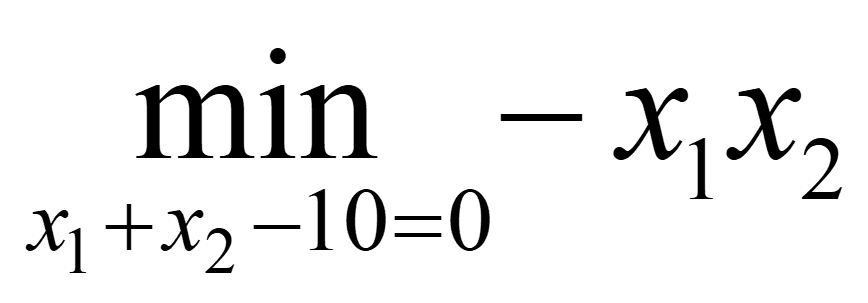

Построим функцию Лагранжа:

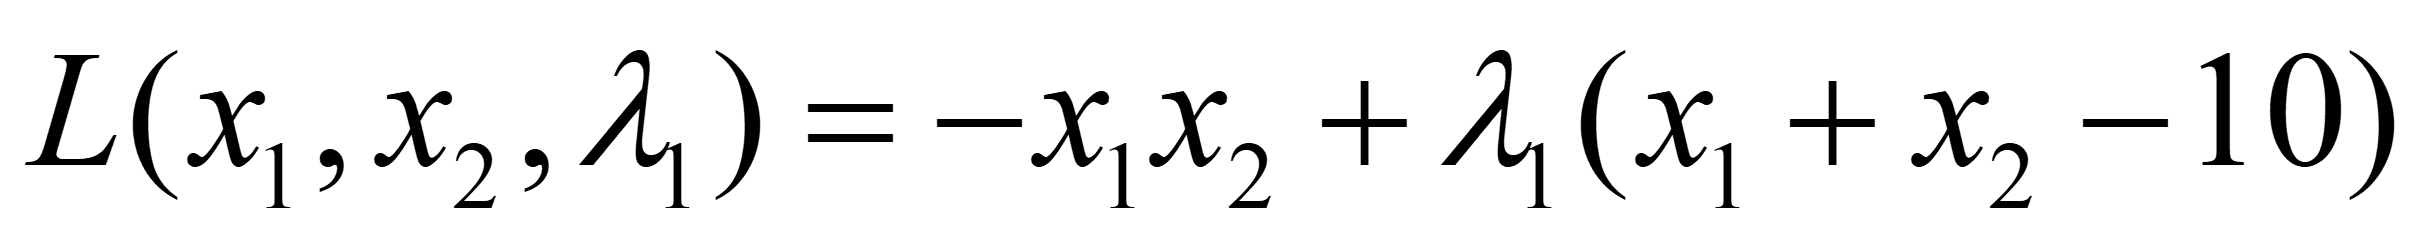

Строим частные производные:

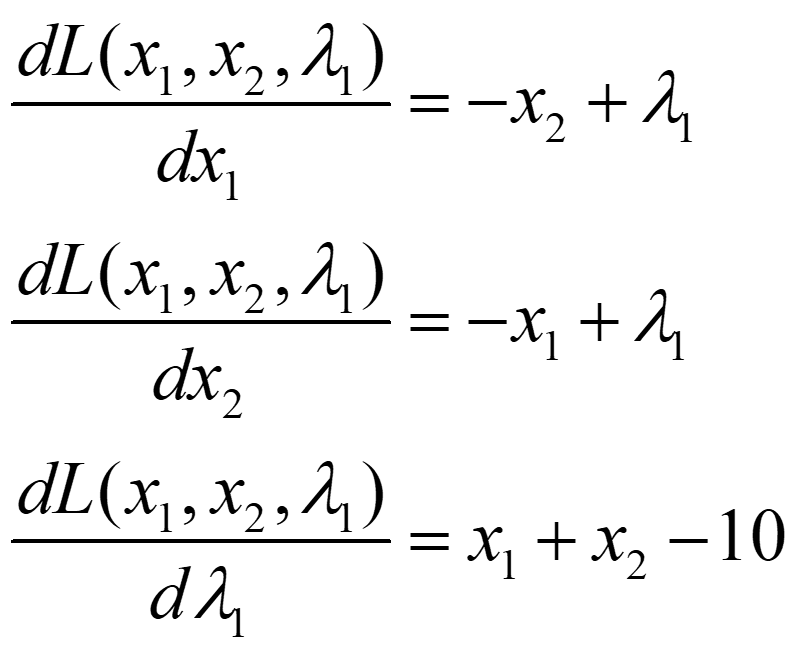

Найдём точки, где все частные производные равны нулю, решив полученную систему [методом Гаусса](https://math1.ru/education/sys_lin_eq/gauss.html):

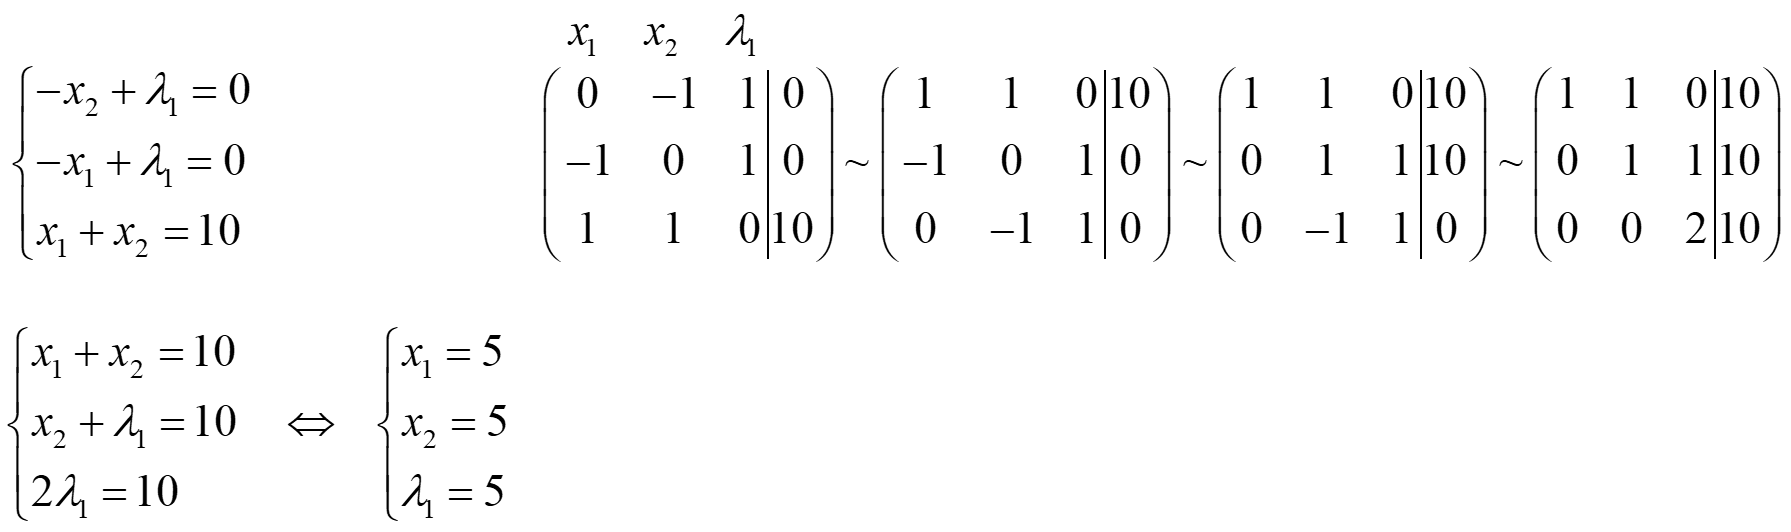

Получаем искомые *__x1__* и *__x2__*, т.е. наибольшая площадь будет у квадрата 5 × 5. И максимальная площадь, которую можно огородить, равна 25 м2.

### Почему метод Лагранжа работает?

Рассмотрим частную производную функции Лагранжа по *__λi__*

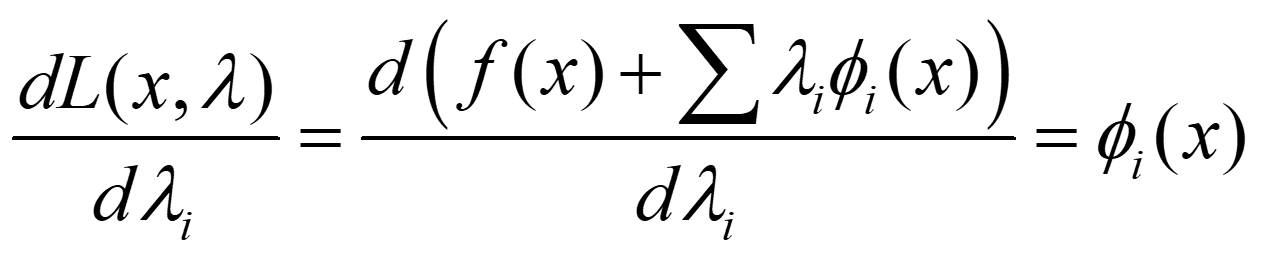

Заметим, что если частная производная равна нулю, то и функция ограничения *__φi__* равна нулю — ограничение выполняется.  

В точках, где все ограничения выполняются:

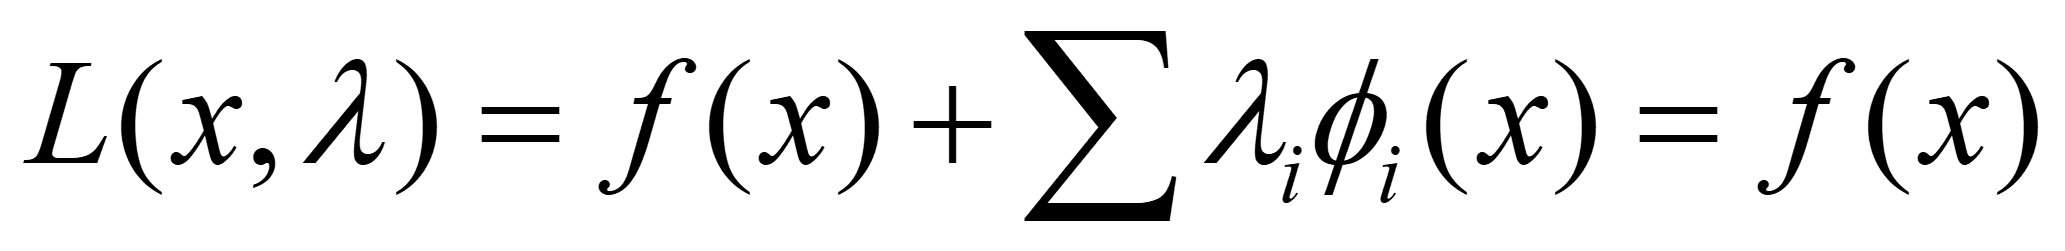

Таким образом, минимизация функции Лагранжа означает, что все ограничения выполняются и *__f(x)__* минимизируются.

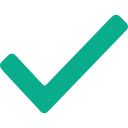

Необходимое условие выполнения метода: функции *__f(x)__* и *__φi(x)__* и их производные непрерывны и дифференцируемы во всех исследуемых точках.

[К содержанию](#0)

---

# Метод Лагранжа. Ограничения ─ неравенства<a name="3"></a>

Ограничения в виде неравенства можно свести к ограничениям равенства с помощью дополнительной переменной: ![image.png](attachment:image.png)

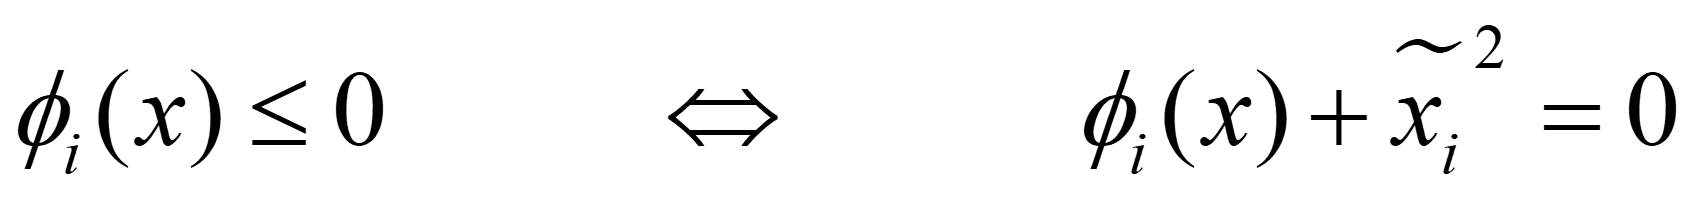

Решаем задачу оптимизации с полученным ограничением–равенством уже известным образом.  

Вернёмся к предыдущей задаче, добавив условие, что хотя бы одна сторона должна быть не меньше 6.

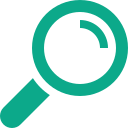

### Задача

У вас есть 20 метров забора, можно им огородить любой прямоугольник. Какую максимальную площадь можно огородить? Хотя бы одна сторона должна быть не меньше 6.

__Решение:__

Сформулируем задачу как задачу оптимизации

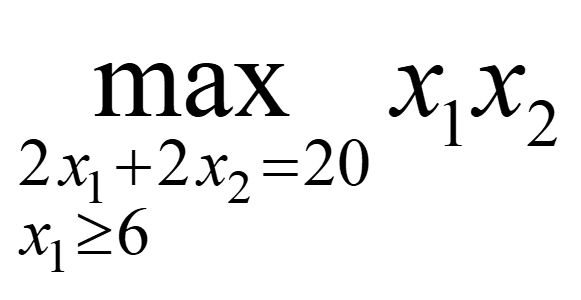

Сведём задачу к минимизации с ограничениями–равенствами, переформулировав второе ограничение:

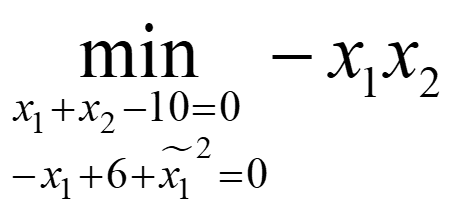

Построим функцию Лагранжа:

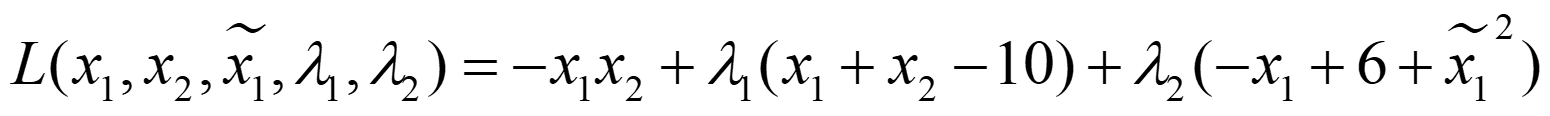

Найдём все частные производные:

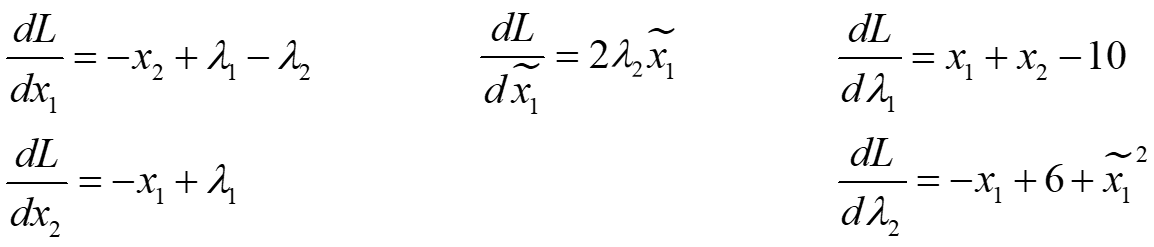

Найдём точки, где все частные производные равны нулю:

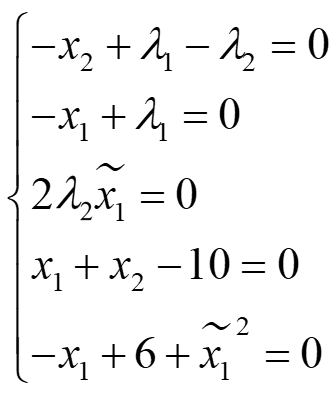

Таким образом, мы свели задачу к решению системы уравнений.

[К содержанию](#0)

---

# Линейное программирование<a name="4"></a>

*Определение*:  __Задача линейного программирования__ — это задача __оптимизации__, в которой целевая функция и функции–ограничения линейны, а все переменные неотрицательны:

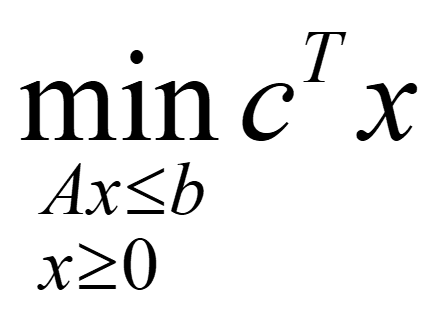

Здесь *__c__* и *__x__* — векторы.

*Определение*:  __Целочисленным линейным программированием__ (ЦЛП) называется вариация задачи линейного программирования, когда все переменные — __целые числа__.

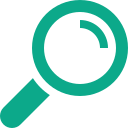

### Задача

Вы отвечаете за рекламу в компании. Затраты на рекламу в месяц не должны превышать 10 000 руб. Один показ рекламы в интернете стоит 1 рубль, а на телевидении 90 рублей. Практика показывает, что 1 показ телерекламы приводит в среднем 300 клиентов, а 1 показ в интернете приводит 0,5 клиента. При этом телерекламы нельзя купить больше 20 показов. Вам нужно привести как можно больше клиентов.

__Решение:__

Обозначим за *__x1__* количество показов в интернете, за *__x2__* количество показов на телевидении. Будем максимизировать количество приведенных клиентов *__0,5x1 + 300x2__*. Составим задачу минимизации с ограничением в количестве показов и затрат:

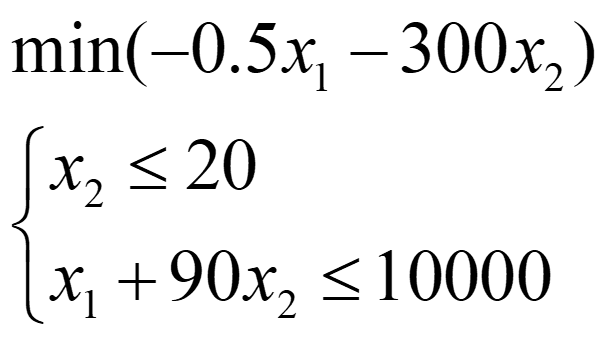

Задачу можно переформулировать в матричном виде следующим образом:

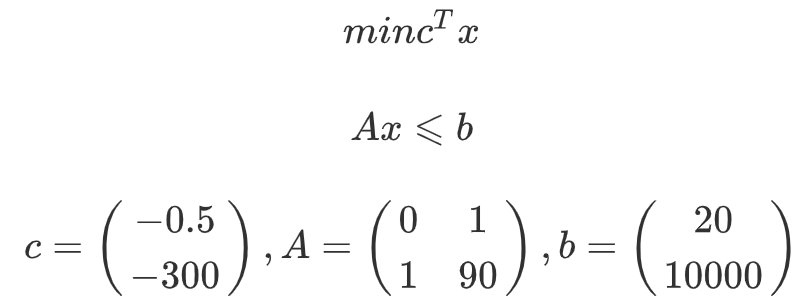

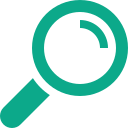

### Задача о назначениях

У вас есть *__n__* задач и *__n__* человек, которые могут их сделать. Каждая задача должна быть сделана одним человеком и каждый должен сделать ровно одну задачу. У человека *__i__* задача *__j__* будет стоить *__с__ij*. Вам нужно сделать все задачи как можно дешевле.

__Решение:__

Сформулируем задачу как задачу ЦЛП.  

Пусть *__x__ij __= 1__*, если задачу *__j__* выполнит человек *__i__*, а если работы выполнил кто-то другой, то  *__x__ij __= 0__*.  

Минимизируем суммарную стоимость *__с__ij* · *__х__ij*.  

Первое условие: *__x__* либо 0, либо 1.  
Второе условие: каждый человек должен взять ровно одну задачу.  
Третье условие: каждую задачу должен взять ровно один человек.

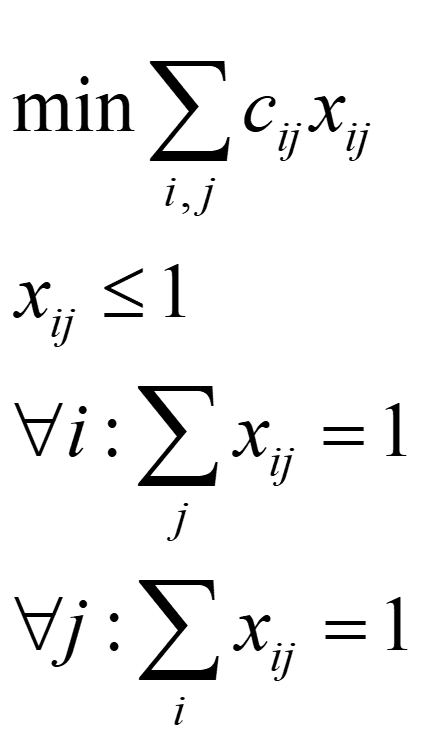

Пример:

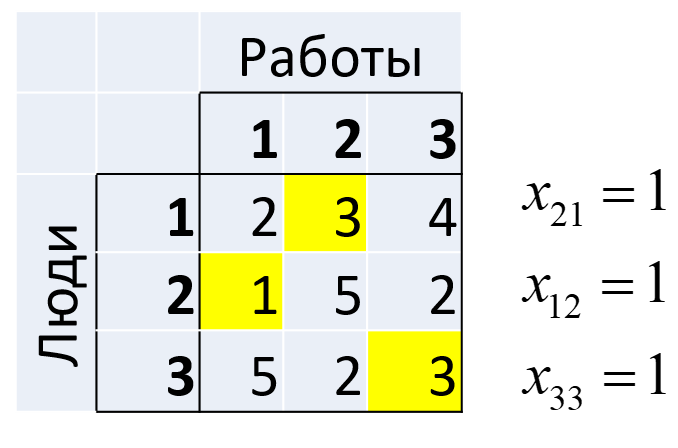

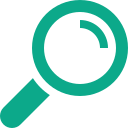

Вам нужно объехать n пунктов, время в пути между пунктами *__i__* и *__j__* равно *__d__ij*. Нужно объехать все пункты, чтобы минимизировать суммарное время в пути. В каждый пункт нужно заехать ровно один раз.

__Решение:__

Сформулируем задачу как задачу ЦЛП. Пусть мы имеем множество отрезков между парами пунктов, и отрезок *__x__ij __= 1__*, если в наш путь вошёл отрезок между пунктами *__i__* и *__j__*, и 0 если не вошёл. Целевая функция — суммарное время проезда.  

Первое условие: *__x__* либо 0, либо 1.  
Второе условие: в каждый пункт нужно въехать ровно один раз.  
Третье условие: из каждого пункта нужно выехать ровно один раз.

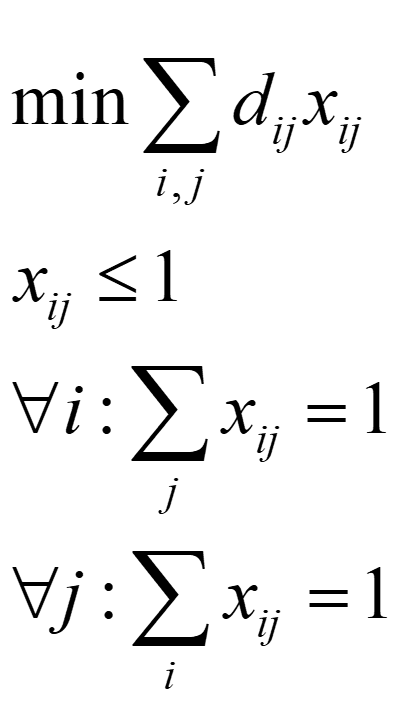

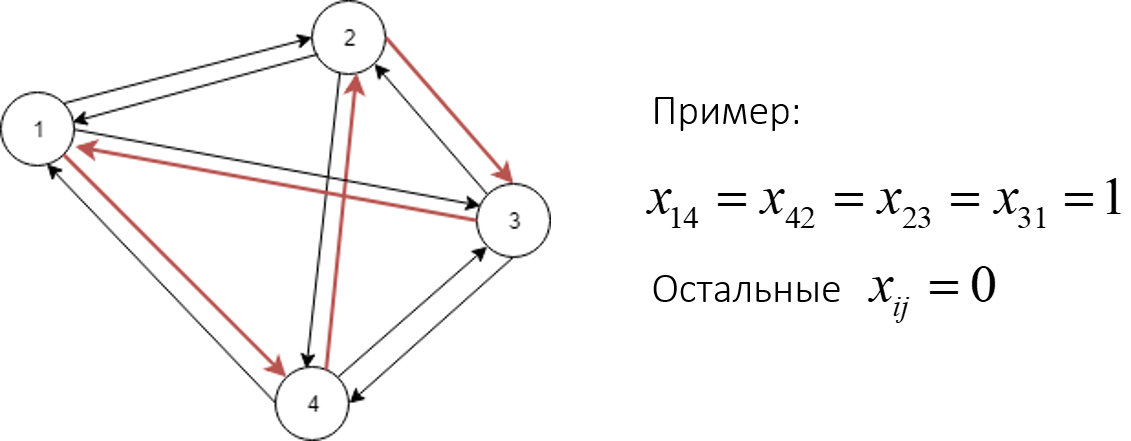

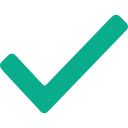

Самое главное здесь — сформулировать задачу как ЛП и потом загрузить её в __библиотеку__, которая её решит. Задачи ЦЛП намного дольше вычисляются, чем задачи обычного ЛП — есть примеры с 10 000 переменных и 10 000 ограничений, для которых неизвестно оптимальное решение.

Не учтён случай, когда маршрут разбивается на два. В этом случае выполняется условие, что в каждую точку можно заехать только один раз и выехать только один раз, однако маршрут получается несвязным.


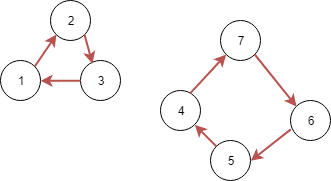

Чтобы наложить ограничение на связность, нужно добавить дополнительные переменные *__u__i* — порядок точки *__i__* в пути, если начинать с точки 1. То есть если путь начинается с 1 точки, а потом идёт 3-я, а затем 6-я, то *__u__3 __= 2, u__6 __= 3__* и т.д. Таким образом, *__0 ≤ u__i __≤ n−1__*, где *__n__* — количество точек, которые нужно посетить (если индексация идет с нуля). Также нужно добавить ещё одно условие:

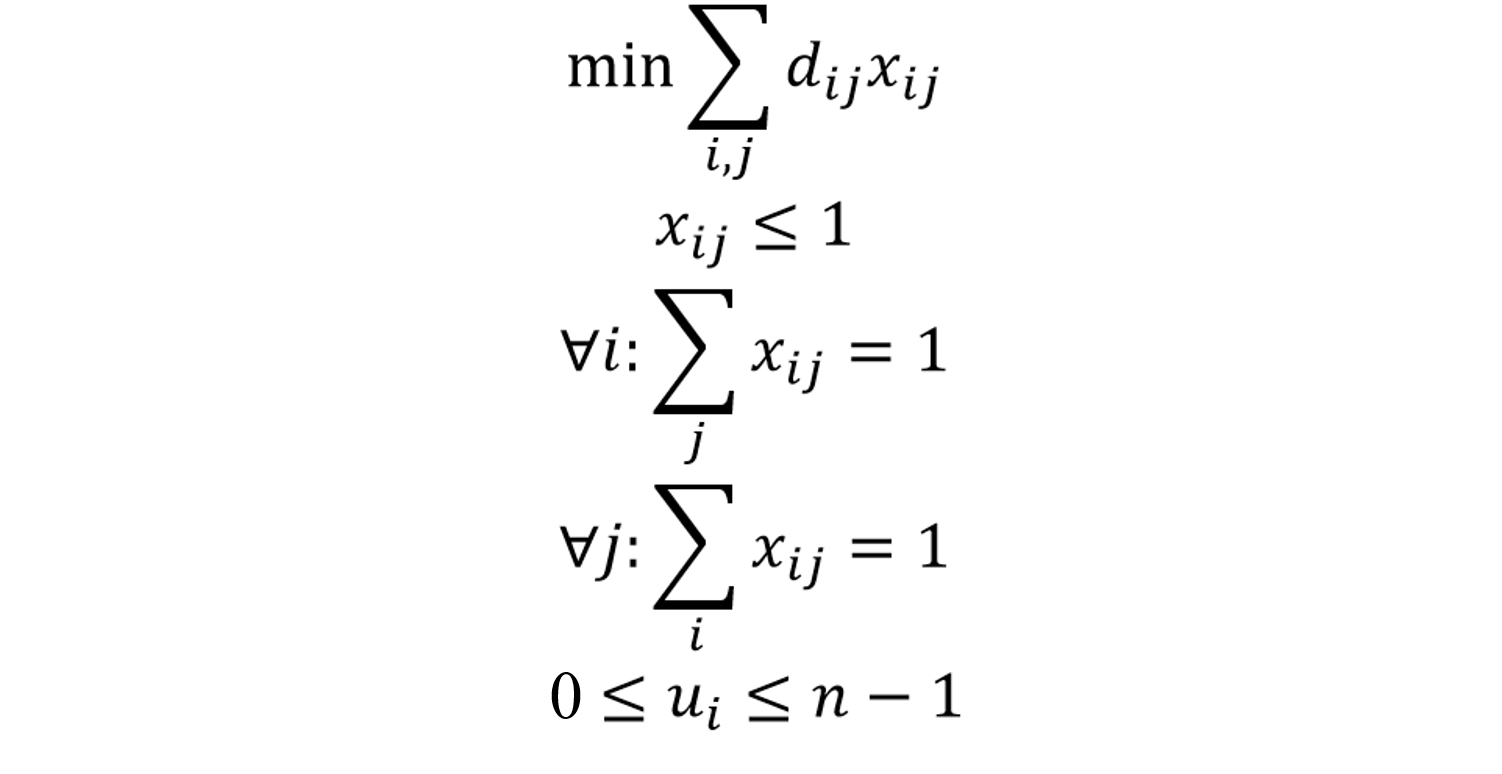

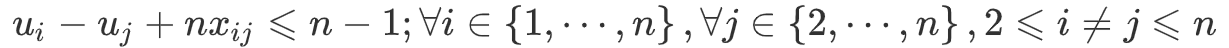

Почему последнее условие будет выполняться для связных маршрутов: если *__x__ij __= 0__* (вершины *__i__* и *__j__* не соединены), то это уравнение принимает вид *__u__i __− u__j __≤ n−1__* и выполняется всегда, так как *__0 ≤ u__i __≤ n−1__*. Если *__x__ij __= 1__*, то вершина *__j__* идёт после вершины *__i__* в пути, а значит *__u__i __− u__j __= −1__* и условие также выполняется.  

Почему последнее условие не будет выполняться для несвязных маршрутов: на примере выше есть цикл *__(4,7,6,5)__*, в который не входит вершина 1. Рассмотрим условия для четырех рёбер этого цикла *__(n = 7)__*:

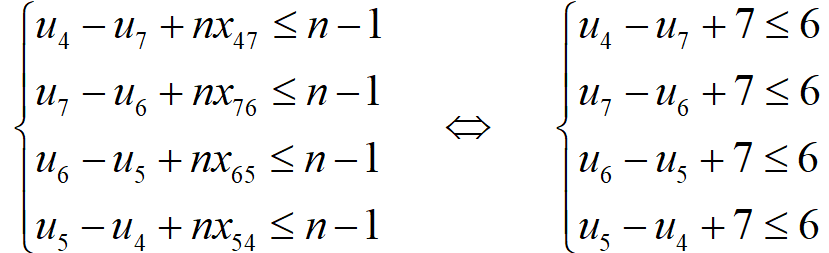

Складываем эти неравенства и получаем *__28 ≤ 24__*. Противоречие. Аналогично для общего случая. Таким образом, правильная формулировка задачи коммивояжёра как линейного программирования выглядит так:

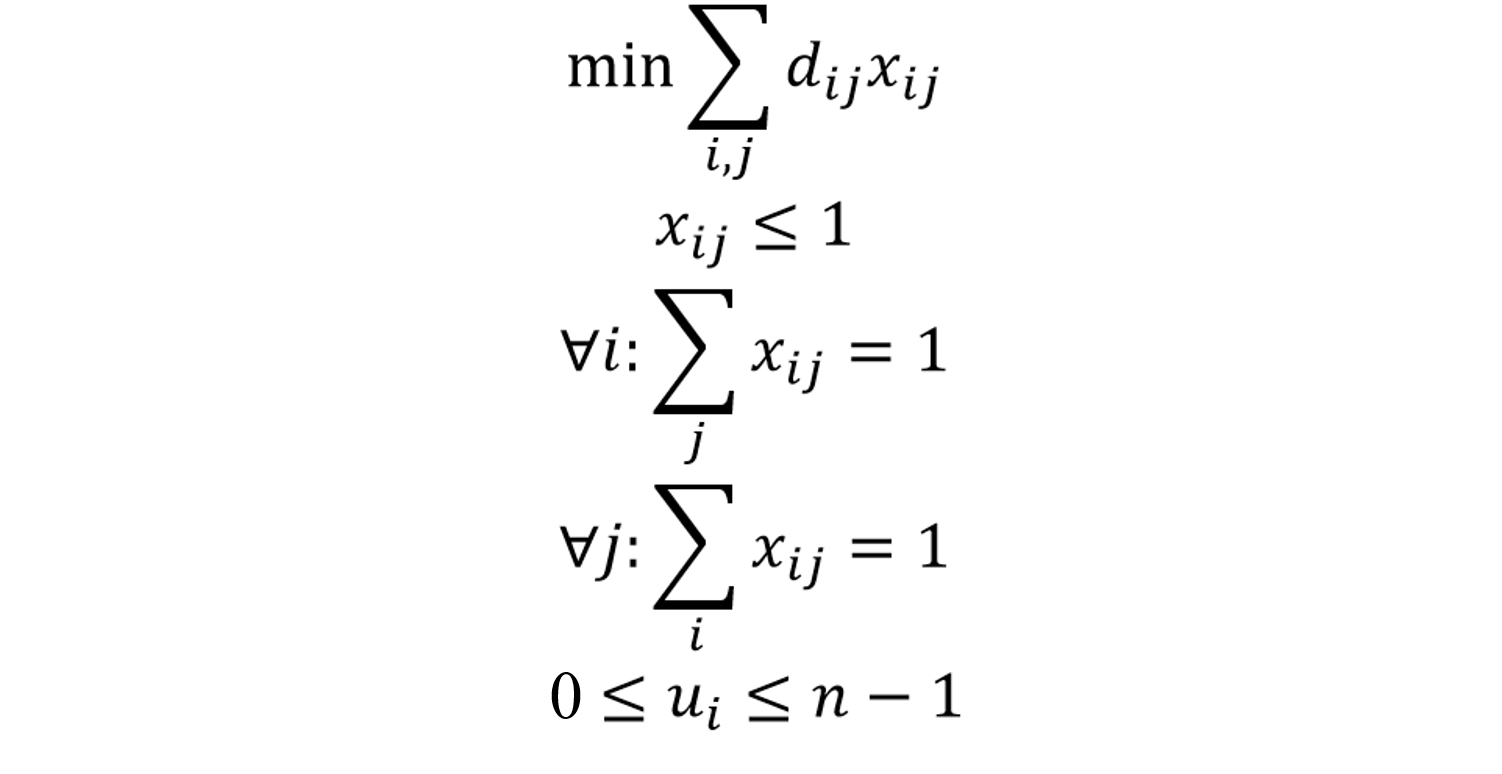

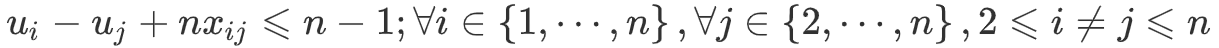

[К содержанию](#0)

---

# Практика. Линейное программирование<a name="5"></a>

Допустим, у нас есть $n$ товаров с заданными стоимостями $v_i$ и массой $w_i$. В сумку убирается $С$ кг. Сколько какого товара взять, чтобы сумма всех стоимостей товаров была наибольшей?

In [ ]:
values = [4, 2, 1, 7, 3, 6]
weights = [5, 9, 8, 2, 6, 5]
C = 15
n = 6

Сформулируем задачу:
$$\max\sum v_i x_i$$
$$\sum w_i x_i \leq C $$

Как должна выглядеть задача:
$$\min c^T x$$
$$A x \leq b $$

Получается, что $c=-v$, $A=w^T$, $b=(C)$

In [ ]:
c = - np.array(values)
A = np.array(weights)         #shape = (6,)
A = np.expand_dims(A, 0)      #shape = (1,6)
b = np.array([C])

In [ ]:
linprog(c=c, A_ub=A, b_ub=b)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


     con: array([], dtype=float64)
     fun: -52.50000000003075
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([-2.24904539e-11])
  status: 0
 success: True
       x: array([6.18738527e-14, 1.05853305e-12, 1.21475942e-13, 7.50000000e+00,
       4.00246688e-13, 4.71394158e-13])

In [ ]:
x = cvxpy.Variable(shape=n, integer = True)

In [ ]:
constraint = (A @ x <= b)
total_value = c * x

In [ ]:
problem = cvxpy.Problem(cvxpy.Minimize(total_value), constraints=[constraint])

In [ ]:
problem.solve()

-inf

In [ ]:
x.value

Теперь положительные $x$

In [ ]:
x = cvxpy.Variable(shape=n, integer=True)
constraint = (A @ x <= b)
x_positive = (x >= 0)
total_value = c * x
problem = cvxpy.Problem(cvxpy.Minimize(total_value), constraints=[constraint, x_positive])
problem.solve()

-49.0

In [ ]:
x.value

array([0., 0., 0., 7., 0., 0.])

Теперь $x = 0$ или $1$

In [ ]:
x = cvxpy.Variable(shape=n, boolean=True)
constraint = A @ x <= b
x_positive = x >= 0
total_value = c * x
problem = cvxpy.Problem(cvxpy.Minimize(total_value), constraints=[constraint, x_positive])
problem.solve()

-17.0

In [ ]:
x.value

array([1., 0., 0., 1., 0., 1.])

### Задачи

Составьте оптимальный план перевозок, со Склада № 1 и Склада № 2, в три торговых центра, с учётом тарифов, запасов и потребностей, которые указаны в таблице:

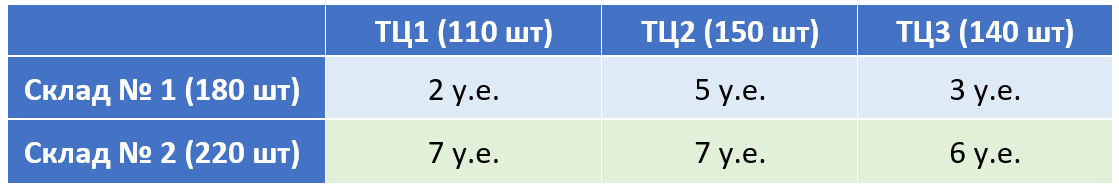

In [ ]:
#x - вектор кол-ва перевезенных товаров (сначала из 1-го склада в 3 ТЦ, затем из 2-го склада в 3 ТЦ)
# ограничения-неравенства: x1+x2+x3 <=180, x4+x5+x6 <= 220
# ограничения-равенства: x1+x4=110, x2+x5=150, x3+x6=140

c1=[2, 5, 3, 7, 7, 6]
A_ub1=[[1, 1, 1, 0, 0, 0], [0, 0, 0, 1, 1, 1]]
b_ub1=[180, 220]
A_eq1=[[1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 0, 1]]
b_eq1=[110, 150, 140]

result = linprog(c1, A_ub1, b_ub1, A_eq1, b_eq1)
(result.x*np.array(c1)).sum()



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


1899.9999256826418

Решите задачу о назначениях

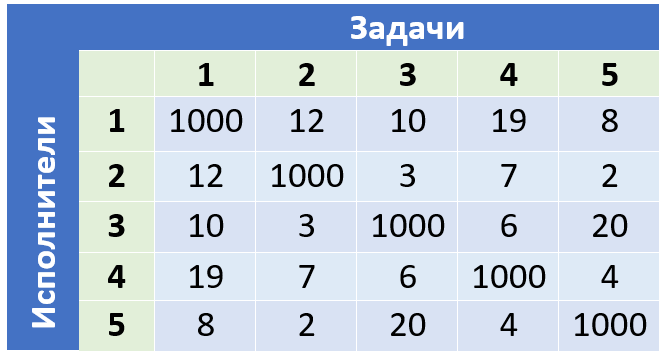

In [ ]:
c = np.array([[1000, 12, 10, 19, 8],
              [12, 1000, 3, 7, 2], 
              [10, 3, 1000, 6, 20], 
              [19, 7, 6, 1000, 4], 
              [8, 2, 20, 4, 1000]])

x = cvxpy.Variable(shape=(5,5), boolean=True)

constraints = [cvxpy.sum(x, axis=0) == np.ones(5),
               cvxpy.sum(x, axis=1) == np.ones(5)]

func = cvxpy.sum(cvxpy.multiply(x, c))

problem = cvxpy.Problem(cvxpy.Minimize(func), constraints=constraints)
problem.solve(solver='ECOS_BB')

31.999999999961364

Необходимо найти кратчайший маршрут из точки *__A__*, который проходит через все другие точки и возвращается в *__A__*.

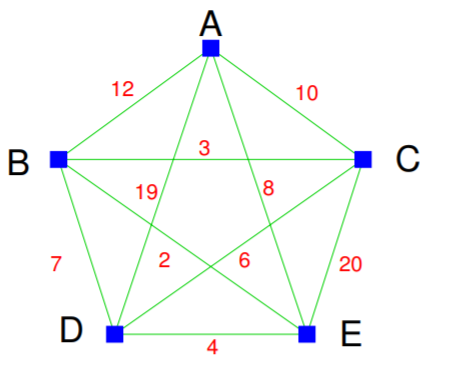

In [ ]:
x = cvxpy.Variable(shape=(5,5), boolean=True)
u = cvxpy.Variable(shape=5, integer=True)
from itertools import product
constraints = [
    cvxpy.sum(x, axis=0) == np.ones(5),
    cvxpy.sum(x, axis=1) == np.ones(5),
    u >= 0,
    u <= 4,
    cvxpy.sum(cvxpy.diag(x)) == 0
]
for i, j in product(range(5), range(5)):
    if i >= 0 and j >= 1 and i != j:
        constraints.append(u[i] - u[j] + 5 * x[i,j] <= 4)

d = np.array([[0, 12, 10, 19, 8], 
              [12, 0, 3, 7, 2], 
              [10, 3, 0, 6, 20], 
              [19, 7, 6, 0, 4], 
              [8, 2, 20, 4, 0]])
func = cvxpy.sum(cvxpy.multiply(x, d))
problem = cvxpy.Problem(cvxpy.Minimize(func), constraints=constraints)
problem.solve(solver='ECOS_BB')

31.99999994152333

[К содержанию](#0)

---

# Градиентный спуск<a name="6"></a>

Решение задачи оптимизации методом множителей Лагранжа заключается в решении общей системы уравнений. Для этого метода может не существовать решений, или они будут сложными. Другой подход к нахождению минимума функции — метод градиентного спуска.

__Градиентный спуск__ — самый используемый [алгоритм](https://neurohive.io/ru/osnovy-data-science/gradient-descent/) обучения, он применяется почти в каждой модели машинного обучения и является наиболее простым в реализации из всех методов локальной оптимизации. 

Представим, что нам нужно найти глубину озера. Но мы не видим дна и можем замерить глубину на небольшом участке.

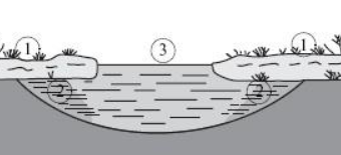

Замерим глубину на первом участке.  

Если мы видим, что склон идёт вправо, то следующий участок имеет смысл проверять справа. Если видим, что уклон влево — проверяем слева.  

Но как узнать, на сколько вправо или влево двигаться?

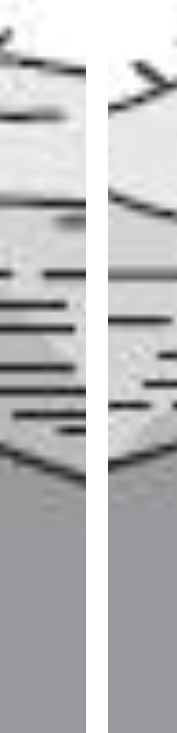

Если уклон сильный, то скорее всего, самая глубокая точка ещё далеко, и можно сильно двигаться в сторону.  

Если слабый — то мы около самой глубокой точки, и можно сделать небольшой шаг.

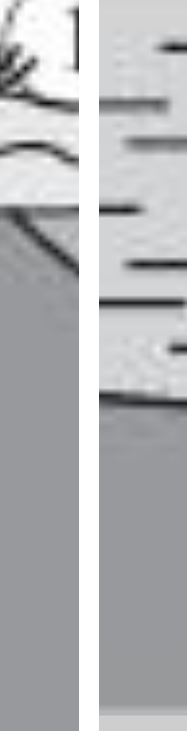

Вид сверху выглядит так:

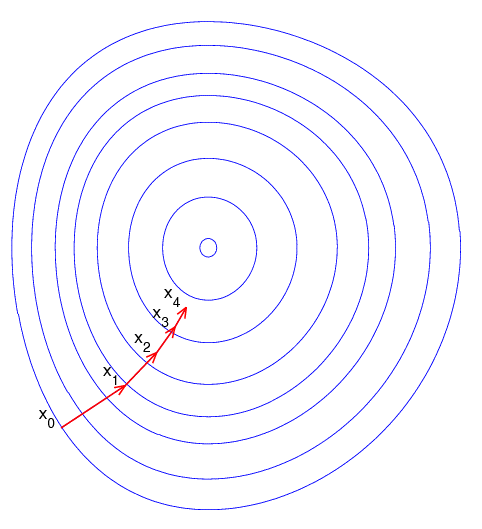

Теперь переведём этот алгоритм на математический язык. За «крутость склона» отвечает градиент.

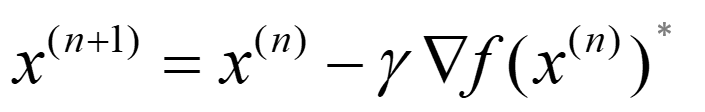

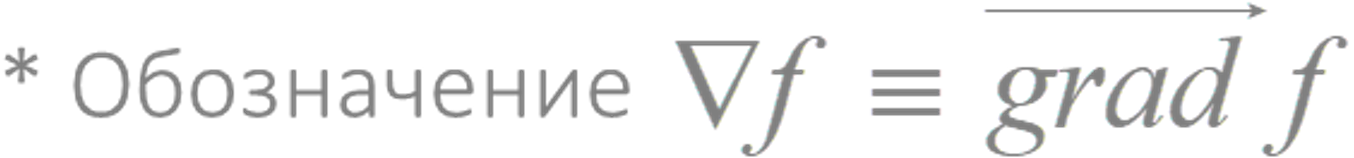

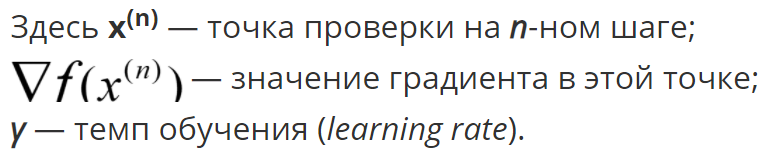

Темп обучения — основной параметр алгоритма, он определяет то, на сколько сильно мы будем двигать нашу точку. Градиент указывает направление роста функции, а нам интересен минимум, то есть противоположное направление,поэтому в формуле градиент использован со знаком минус  

Можно сравнить градиентный спуск с каплей воды, которая стекает по чаше — и если у этой чаши есть локальный минимум, то алгоритм может сойтись в него

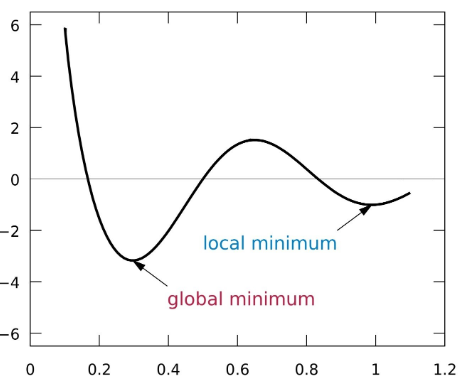

Как бороться:

1. Начинать из нескольких точек.

2. Уменьшать и увеличивать темп обучения в процессе работы.

3. Рандомизировать градиент.


В ML оптимизируют функции потерь и градиент функции потерь можно брать не по всей выборке, а по её случайной части (она называется __батчем__). В таком случае градиентный спуск называется __стохастическим__.

Наличие только глобального минимума не гарантирует, что градиентный спуск хорошо сработает. Увеличение *learning rate* может помочь выпрыгнуть из локального минимума

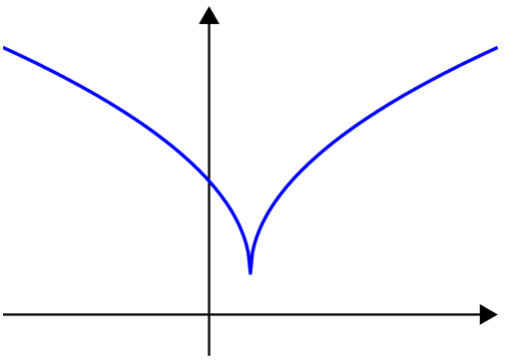

Даже для обычной выпуклой функции градиентный спуск может сходиться медленно, если выбран слишком маленький темп обучения, или не сходиться вообще, если слишком большой. При этом скорость это очень важно, так как и функция, и градиент могут вычисляться очень долго. Поэтому скорость обучения — это один из самых важных параметров, на который мы можем повлиять.

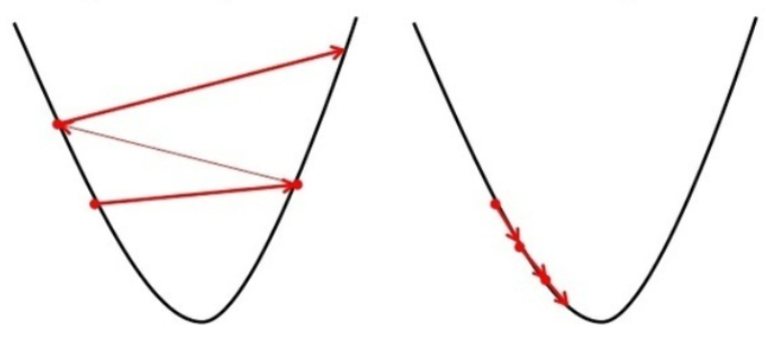

[К содержанию](#0)

---

# Практика. Градиентный спуск<a name="7"></a>

In [2]:
def f(x, y):
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2
def grad(x, y):
    dx = 2 * x - 2 + 100 * (-4 * y * x + 4 * x ** 3)
    dy = 100 * (2 * y - 2 * x ** 2)
    return (dx, dy)

In [ ]:
x0 = (0, 2)
gamma = 1e-3
x_cur = x0

vals = []
coords = []
i = 0
while True:
    x_new = (x_cur[0] - gamma * grad(*x_cur)[0],
            x_cur[1] - gamma * grad(*x_cur)[1])
    if dist(x_new, x_cur) < 1e-9:
        break
    x_cur = x_new
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i += 1
    print(f"iter={i}; x=({x_cur[0]:.2f}, {x_cur[1]:.2f});"
          f" f(x)={f(*x_cur):.2f}; grad f(x)=({grad(*x_cur)[0]:.2f}, {grad(*x_cur)[1]:.2f})")

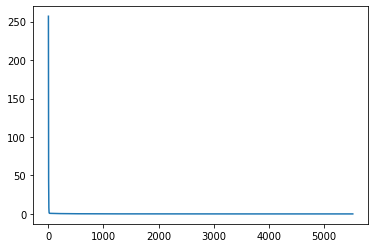

In [10]:
plt.plot(vals)

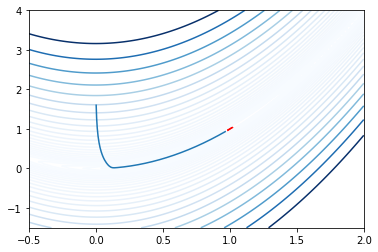

In [11]:
n = 100 # number of discretization points along the x-axis
m = 100 # number of discretization points along the x-axis
a=-0.5; b=2. # extreme points in the x-axis
c=-1.5; d=4. # extreme points in the y-axis
X,Y = np.meshgrid(np.linspace(a,b,n), np.linspace(c,d,m))

Z = f(X,Y)

plt.xlim(a,b)
plt.ylim(c,d)

plt.contour(X,Y,Z, np.logspace(-0.5, 3, 31),cmap='Blues')
plt.plot([c[0] for c in coords], [c[1] for c in coords])
plt.scatter(1,1,c='red')



In [8]:
def dist(x1, x2):
    return (x1[0] - x2[0]) ** 2 + (x1[1] - x2[1]) ** 2

In [12]:
def f_for_scipy(x):
    return f(x[0], x[1])

In [17]:
optimize.minimize(lambda x: f(*x), x0=(0, 0)) 

      fun: 2.8439678482945157e-11
 hess_inv: array([[0.49482463, 0.98957652],
       [0.98957652, 1.98394249]])
      jac: array([ 3.98697753e-06, -2.84422585e-06])
  message: 'Optimization terminated successfully.'
     nfev: 96
      nit: 19
     njev: 24
   status: 0
  success: True
        x: array([0.99999467, 0.99998932])

### Задачи

Найдите градиентным спуском минимум функции

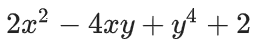

In [18]:
def f(x, y):
    return 2*x**2 - 4*x*y + y**4 + 2

In [20]:
optimize.minimize(lambda x: f(*x), x0=(0, 1)) 

      fun: 1.0000000000004632
 hess_inv: array([[0.3828577 , 0.13026725],
       [0.13026725, 0.12852182]])
      jac: array([-5.96046448e-07, -1.84774399e-06])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([0.99999952, 0.99999968])

Найдите градиентным спуском минимум функции 

In [21]:
def f(x, y, z):
    return x**3 - 2*x**2 + y**2 + z**2 - 2*z*y + x*z - y*z + 3*z

In [25]:
optimize.minimize(lambda x: f(*x), x0=(0, 0, 0)) 

      fun: -34156496500.58559
 hess_inv: array([[ 2.11301955e-04, -3.59627227e-02, -8.65768701e-02],
       [-3.59627227e-02,  1.64877958e+01,  4.22524816e+01],
       [-8.65768701e-02,  4.22524816e+01,  1.08526538e+02]])
      jac: array([52830208.,  3284992., -1212416.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 436
      nit: 24
     njev: 85
   status: 2
  success: False
        x: array([    4255.95102102,  -605702.38983038, -1503354.49809447])

[К содержанию](#0)

---

# Градиентный спуск с momentum<a name="8"></a>

__Чем хорош градиентный спуск:__

1. Нет никаких ограничений на функцию — нужно только уметь вычислять градиент.

2. Можно придумать много *хаков*, которые помогут сходимости (начинать из разных точек, уменьшать и увеличивать темп обучения в процессе работы, рандомизировать градиент).

На практике сегодня все __нейронные сети__ обучают именно градиентным спуском и его вариациями (например, Adam, SGD и др.).

Заметим, что для ускорения спуска было бы неплохо учитывать изменения на прошлом шаге. В примере на рисунке мы видим, как алгоритм колеблется вокруг одной прямой. Было бы здорово явно сказать алгоритму держаться ближе к прямой и двигаться вдоль неё.

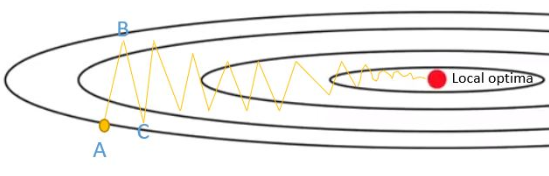

Решить эту проблему позволяет одна из вариаций градиентного спуска — градиентный спуск с *__momentum__*:

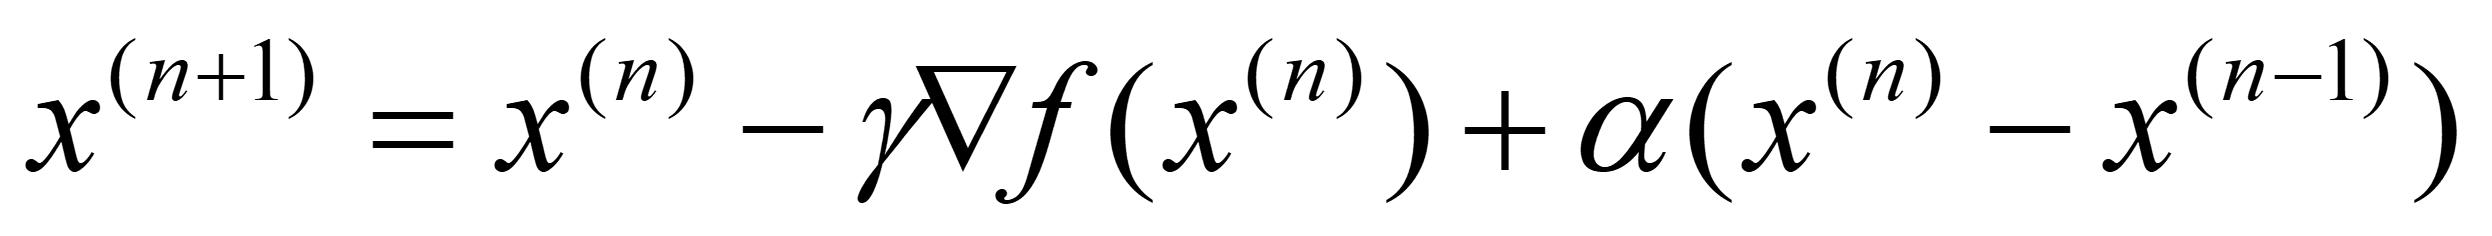

Идея заключается в том, что на каждой итерации градиентного спуска *__x__* изменяется не только на градиент, помноженный на темп обучения, но и на __вектор__, на который мы передвинулись в прошлом шаге, с некоторым __коэффициентом__.

В формуле выше: *__α__* — это параметр, который будет показывать, насколько сильно будет учитываться прошлый шаг. Для предыдущего примера это работает так: точка начинает двигаться вдоль прямой, которая ведёт к локальному минимуму:

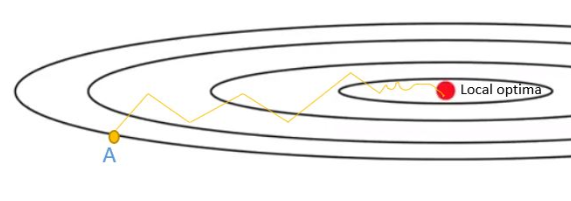

А значит, алгоритм сходится быстрее. *Momentum* переводится как *__импульс__*, и идея алгоритма отражает идею импульса в физике — пытаемся сымитировать __инерцию__ точки.

[К содержанию](#0)

---

In [27]:
90*0.25

22.5

# Метод Ньютона<a name="9"></a>

Рассмотрим еще один численный метод. __Метод Ньютона__ изначально появился как метод решения уравнений вида *__f(x) = 0__*.

Для *__x__* вычисляется *__f(x)__*, строится касательная, и в точке пересечения касательной с осью *__Ox__* строится новая точка, к которой также строится касательная и т.д. Доказано, что таким образом *__x__i* приближается к значению, где *__f(x) = 0__*. Формализуется это так:

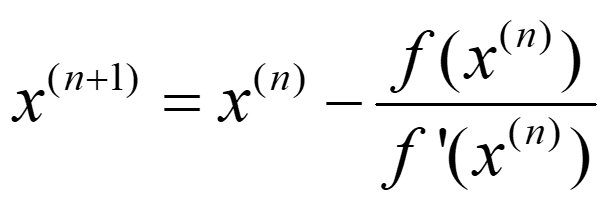

В задаче оптимизации можно решать не *__f(x) = 0__*, а *__f ’(x) = 0__*, тогда найдём потенциальные точки экстремума следующим образом:

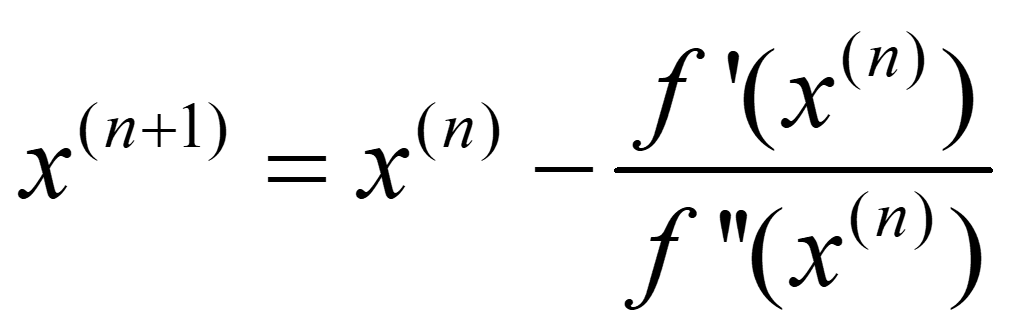

В многомерном случае по аналогичным рассуждениям производная превращается в градиент, а вторая производная превращается в гессиан (здесь __гессиан__ — матрица вторых производных или, как мы её называли в предыдущем модуле, матрица Гессе). Поэтому в формуле появится обратная матрица.

Для многомерного случая формула выглядит следующим образом:

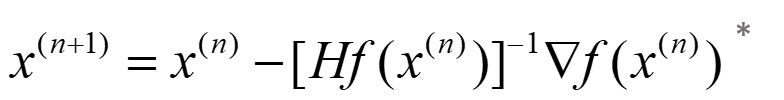

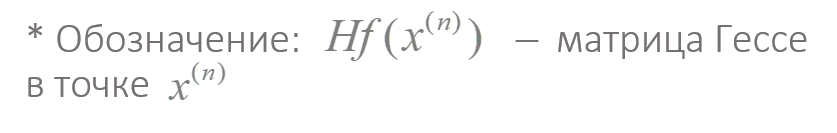

Можно заметить, что эта формула совпадает с формулой для градиентного спуска, но вместо умножения на *learning rate* используется умножение на __обратную матрицу__ к гессиану. Благодаря этому функция может сходиться за меньшее количество итераций, т.к. мы учитываем информация о __выпуклости__ функции через гессиан.

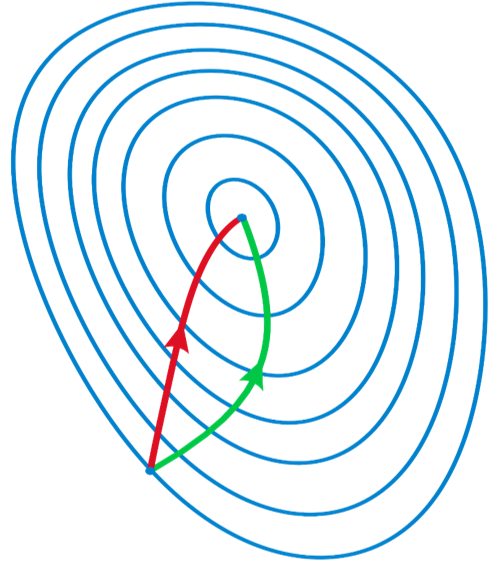

Метод Ньютона в многомерном случае (с гессианом) работает быстрее градиентного спуска, если считать в количестве итераций. На практике обратный гессиан не считают, а вычисляют приблизительно с помощью отдельных алгоритмов. Поэтому этот метод не очень часто используется, так как вычисление обратного гессиана занимает больше времени, которое можно сэкономить за счёт быстрой сходимости.  

Методы, которые используют и градиент, и гессиан, называются __методами второго порядка__.

[К содержанию](#0)

---

# Метод отжига<a name="10"></a>

Рассмотрим ещё один метод — __метод отжига__. Отметим, что градиентный спуск хорош, но работает очень плохо, если у функции много __локальных минимумов__. 

Идея заключается в том, чтобы позволить значению функции в точке иногда ухудшаться.

### Алгоритм следующий:

1. Выбираем начальную точку *__x(0)__*, и назначаем номер итерации *__k = 0__*.

2. На каждом этапе случайно выбираем ___x*___ из окрестности *__x(k)__*.

3. Если

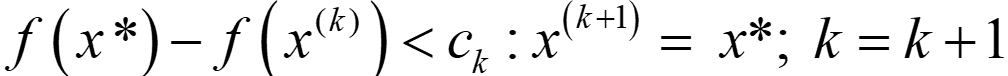

*__ck__* — параметр, определяющий, на сколько значение функции может ухудшаться.

Метод называется так, потому что симулирует физический процесс отжига, когда металл медленно охлаждается. Поэтому часто в контексте этой задачи вместо «функция» говорят «__температура__».

Применяя этот метод предстоит ответить на два вопроса:  
Как выбираем ___x*___?  
Как выбираем ___ck___?

Как правило, оба выбираются случайно. Главное: ___ck___ должно сходиться к нулю.

### Плюсы метода отжига:

1. Не использует градиент.

2. Можно использовать даже для дискретных функций.

### Минусы метода отжига:

1. Сложно *тюнить*.

2. Нет гарантий сходимости.

[К содержанию](#0)